     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 21.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
Размер датасета: (1372, 5)


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Лучшие параметры: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Лучшая кросс-валидационная точность: 1.0

=== Classification report ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       191
           1     1.0000    1.0000    1.0000       152

    accuracy                         1.0000       343
   macro avg     1.0000    1.0000    1.0000       343
weighted avg     1.0000    1.0000    1.0000       343



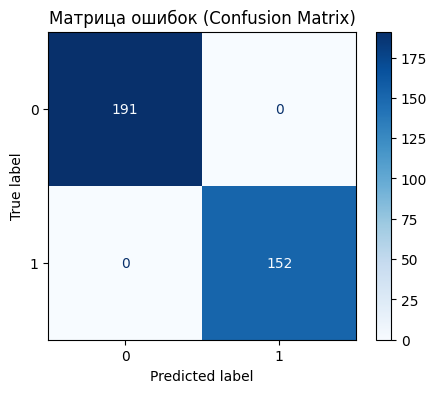

In [ ]:
# --------------------------------------------
#  Лабораторная №6. Машина опорных векторов
#  Датасет: Banknote Authentication (UCI)
# --------------------------------------------

# == Установка недостающих пакетов ==
!pip -q install -U scikit-learn pandas seaborn matplotlib

# == Импорт библиотек ==
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"

# У датасета нет заголовков, прописываем их вручную
col_names = ["variance", "skewness", "curtosis", "entropy", "class"]
df = pd.read_csv(url, header=None, names=col_names)

print("Размер датасета:", df.shape)
display(df.head())


X = df.drop("class", axis=1)
y = df["class"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 4. Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


# 5. Подбор гиперпараметров GridSearchCV -----------------
param_grid = {
    "C":      [0.1, 1, 10, 100],
    "gamma":  ["scale", 0.01, 0.1, 1],
    "kernel": ["rbf"]      # можно попробовать 'linear', 'poly'
}

svc = SVC()
grid = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train_scaled, y_train)
print("Лучшие параметры:", grid.best_params_)
print("Лучшая кросс-валидационная точность:", grid.best_score_.round(4))

# 6. Оценка на тесте -------------------------------------
best_svc = grid.best_estimator_
y_pred = best_svc.predict(X_test_scaled)

print("\n=== Classification report ===")
print(classification_report(y_test, y_pred, digits=4))

# 7. Confusion Matrix ------------------------------------
cm = confusion_matrix(y_test, y_pred, labels=best_svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_svc.classes_)
fig, ax = plt.subplots(figsize=(5,4))
disp.plot(ax=ax, cmap="Blues", values_format='d')
plt.title("Матрица ошибок (Confusion Matrix)")
plt.show()

